# Attempt at NN

In [111]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from path import Path
import pandas as pd
import matplotlib.pyplot as plt

In [112]:
# Set the random seed for reproducibility
# Note: This is for the homework solution, but it is good practice to comment this out and run multiple experiments to evaluate your model
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(2)

In [113]:
file_path = Path("../../../../data/cleandata/success_PCA_df.csv")
df = pd.read_csv(file_path)

In [114]:
df.head(2)

,rank_cnc,Name,Ticker,market_cap,price,volume24,pct1h,pct24h,pct7d,country,...,Start,Duration,pre_Duration,compound,negative,neutral,positive,no_of_posts,Longevity,success_PCA
0,35.0,0x,ZRX,210898190,0.731445,195643,0.29,-1.20,-4.96,United States of America,...,2017-08-15 00:00:00,31,0,-0.115233,0.022333,0.029333,0.948333,3.0,364.0,0
1,359.0,Perlin,PERL,7547077,0.019287,23506334,0.79,1.16,-8.86,Singapore,...,2017-09-28 03:00:00,49,0,0.817167,0.053167,0.830500,0.116000,6.0,367.0,0


In [115]:
df.shape

(535, 27)

In [116]:
df.columns

Index(['rank_cnc', 'Name', 'Ticker', 'market_cap', 'price', 'volume24',
       'pct1h', 'pct24h', 'pct7d', 'country', 'platform', 'pre_ico_end',
       'pre_ico_start', 'rating', 'status', 'type', 'End', 'Start', 'Duration',
       'pre_Duration', 'compound', 'negative', 'neutral', 'positive',
       'no_of_posts', 'Longevity', 'success_PCA'],
      dtype='object')

In [125]:
X = df.drop(columns = ['Name','Ticker','country','platform','status','type','pre_ico_end','pre_ico_start','End','Start', 'pre_Duration','success_PCA'])

In [126]:
X.columns

Index(['rank_cnc', 'market_cap', 'price', 'volume24', 'pct1h', 'pct24h',
       'pct7d', 'rating', 'Duration', 'compound', 'negative', 'neutral',
       'positive', 'no_of_posts', 'Longevity'],
      dtype='object')

In [127]:
X = X.values
X.shape

(535, 15)

In [128]:
y = df["success_PCA"].values
y.shape

(535,)

In [129]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [130]:
# Define the model - shallow neural network
nn = Sequential()

# Hidden layer
nn.add(Dense(units=8, input_dim=15, activation="relu"))

# Output layer
nn.add(Dense(units=1, activation="linear"))

In [131]:
# Compile the model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Fit the model
model = nn.fit(X, y, epochs=1000, verbose=0)

In [132]:
# Save model as JSON
nn_json = nn.to_json()

file_path = Path("../NN_model/model_PCA_test_nn.json")

with open(file_path, "w") as json_file:
    json_file.write(nn_json)

# Save weights
file_path = Path("../NN_model/model_PCA_test_nn.h5")
nn.save_weights(file_path)

In [133]:
# Load the saved model to make predictions
from tensorflow.keras.models import model_from_json

# load json and create model
file_path = Path("../NN_model/model_PCA_test_nn.json")

with open(file_path, "r") as json_file:
    model_json = json_file.read()
    
loaded_model = model_from_json(model_json)

# load weights into new model
file_path = Path("../NN_model/model_PCA_test_nn.h5")
loaded_model.load_weights("../NN_model/model_PCA_test_nn.h5")

In [134]:
df["predicted_NN"] = loaded_model.predict(X)
df.iloc[df.index[df['success_PCA'] == 1].tolist()]

,rank_cnc,Name,Ticker,market_cap,price,volume24,pct1h,pct24h,pct7d,country,...,Duration,pre_Duration,compound,negative,neutral,positive,no_of_posts,Longevity,success_PCA,predicted_NN
78,8.0,Cardano,ADA,3214893394,3.420000,1735988258,0.11,-1.49,-2.55,Switzerland,...,350,0,0.828470,0.032200,0.858550,0.109270,100.0,522.0,1,0.822949
404,22.0,Ethereum Classic,ETC,632251075,69.070000,346367843,-0.12,-1.18,-5.06,NaN,...,0,0,0.663146,0.102770,0.025100,0.872110,100.0,779.0,1,1.022269
438,23.0,Basic Attenti...,BAT,547458892,4.760000,642121534,-0.20,-2.10,-9.16,United States of America,...,0,0,0.377329,0.079930,0.037850,0.882180,100.0,779.0,1,0.944530
481,7.0,EOS,EOS,3277372658,21.070000,231846713,-0.46,-1.33,2.49,Cayman Islands,...,20,0,0.563773,0.096670,0.041410,0.861890,100.0,848.0,1,0.945958
524,13.0,Huobi Token,HT,1105888653,0.042654,53437224,-0.50,-1.72,-2.12,Seychelles,...,488,0,0.589474,0.098387,0.032946,0.868753,93.0,1049.0,1,0.960800


In [135]:
df['predicted_NN'].mean()

0.011442810297012329

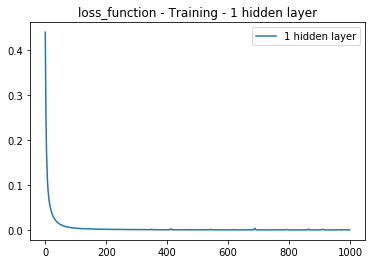

In [136]:
plt.plot(model.history["loss"])
plt.title("loss_function - Training - 1 hidden layer")
plt.legend(["1 hidden layer"])
plt.show()
#This was after I dropped the custom index

In [137]:
min(model.history["loss"])

3.3703136299851037e-05

In [138]:
file_path = Path("../../../../data/cleandata/success_NN_1H_testICO_df.csv")
df.to_csv(file_path, index=False)

# Time to predict using the 360 day ICOs

In [139]:
file_path2 = Path("../../../../data/cleandata/test_and_post_ico/ico_360days_df.csv")
ico_360 = pd.read_csv(file_path2)

In [140]:
# Load the saved model to make predictions
from tensorflow.keras.models import model_from_json

# load json and create model
file_path = Path("../NN_model/model_PCA_test_nn.json")

with open(file_path, "r") as json_file:
    model_json = json_file.read()
    
loaded_model = model_from_json(model_json)

# load weights into new model
file_path = Path("../NN_model/model_PCA_test_nn.h5")
loaded_model.load_weights("../NN_model/model_PCA_test_nn.h5")

In [141]:
ico_360.columns

Index(['rank_cnc', 'Name', 'Ticker', 'market_cap', 'price', 'volume24',
       'pct1h', 'pct24h', 'pct7d', 'country', 'platform', 'pre_ico_end',
       'pre_ico_start', 'rating', 'status', 'type', 'End', 'Start', 'Duration',
       'pre_Duration', 'compound', 'negative', 'neutral', 'positive',
       'no_of_posts', 'Longevity', 'custom_index', 'custom_index_scaled',
       'success_index', 'success_PCA', 'predicted_NN'],
      dtype='object')

In [145]:
X = ico_360[['rank_cnc', 'market_cap', 'price', 'volume24', 'pct1h', 'pct24h','pct7d', 'rating', 'Duration', 'compound', 'negative', 'neutral','positive', 'no_of_posts', 'Longevity']].values
X.shape

(36, 15)

In [146]:
ico_360["Success_Index"] = loaded_model.predict(X)

In [148]:
ico_360.drop(columns = ['predicted_NN','success_PCA','success_index','custom_index','custom_index_scaled'], inplace = True)

In [149]:
ico_360

,rank_cnc,Name,Ticker,market_cap,price,volume24,pct1h,pct24h,pct7d,country,...,Start,Duration,pre_Duration,compound,negative,neutral,positive,no_of_posts,Longevity,Success_Index
0,2358.0,ALLCOIN,ALC,0,0.000460,0,0.00,0.00,0.00,NaN,...,2018-06-15 00:00:00,118,0 days 00:00:00.000000000,0.838165,0.127294,0.032412,0.840471,17.0,20.0,8.276608e+01
1,1753.0,BitGuild PLAT,PLAT,25741,0.000784,0,0.00,0.00,-65.20,Cayman Islands,...,2018-03-16 00:33:33,92,0 days 00:00:00.000000000,0.950900,0.059000,0.049000,0.892000,1.0,76.0,-6.407037e+02
2,48.0,Bytom,BTM,120996522,0.279289,122140708,-1.10,-3.20,2.14,China,...,2017-09-28 03:00:00,46,0 days 00:00:00.000000000,0.538655,0.062863,0.040765,0.896412,51.0,92.0,1.242917e+07
3,851.0,Eden,EDN,1153784,0.000016,188113,-1.13,-8.91,-9.87,Virgin Islands (British),...,2018-05-24 00:00:00,211,0 days 00:00:00.000000000,0.547589,0.073222,0.025889,0.900667,9.0,139.0,-2.542582e+03
4,1356.0,Soma,SCT,171449,0.000221,20214,0.09,-1.82,-7.99,Finland,...,2017-09-27 12:00:00,90,0 days 00:00:00.000000000,0.760300,0.020000,0.005000,0.974000,1.0,139.0,-1.379141e+03
5,1039.0,Hacken,HKN,558260,0.001818,314,-37.25,-69.50,-3.91,Russia,...,2017-10-31 12:00:00,65,0 days 00:00:00.000000000,0.226300,0.006000,0.000000,0.994000,1.0,147.0,-1.249916e+04
6,2085.0,Tesra,TSR,0,0.001088,424036,0.09,-2.54,-4.08,Switzerland,...,2018-03-05 00:00:00,14,0 days 00:00:00.000000000,0.501907,0.079460,0.034260,0.886330,100.0,154.0,5.247623e+04
7,834.0,DAEX,DAX,1224336,0.008369,13863965,1.13,3.50,5.80,NaN,...,2018-09-09 00:00:00,10,0 days 00:00:00.000000000,-0.648600,0.026000,0.962000,0.011000,1.0,155.0,1.690544e+06
8,2059.0,StarChain,STC,0,1.020000,1972607,1.91,-15.95,-13.21,NaN,...,2018-06-17 08:00:00,150,68 days 00:00:00.000000000,0.600258,0.091700,0.042770,0.865540,100.0,169.0,2.443501e+05
9,1230.0,Bezop,BEZ,285662,0.000608,10465,-0.16,-2.62,-20.19,NaN,...,2017-12-20 00:00:00,389,0 days 00:00:00.000000000,0.264089,0.055830,0.852840,0.091310,100.0,178.0,-5.176700e+03


In [150]:
file_path = Path("../../../../data/cleandata/success_NN_1H_ICO360_df.csv")
ico_360.to_csv(file_path, index=False)